In [34]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df1 = pd.read_csv('BankChurners.csv')
df1.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [36]:
df1.shape

(10127, 23)

In [37]:
df1.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [38]:
df1[df1.duplicated()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2


In [39]:
df1c = df1.copy()

In [40]:
# by recomendation admin, remove column 21 & 22 before doing anything

df1c = df1c.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)

In [41]:
df1c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [42]:
# jelaskan variabel M & F

df1c['Gender'] = df1c['Gender'].map({'M' : 'Male', 'F' : 'Female'})

# Nomor 1.1 Visualisasi attrition_flag

In [43]:
# cari bagian masing-masing

df1c.groupby('Attrition_Flag')["Attrition_Flag"].count()

Attrition_Flag
Attrited Customer    1627
Existing Customer    8500
Name: Attrition_Flag, dtype: int64

([<matplotlib.patches.Wedge at 0x1a188cdec30>,
 [Text(0.9628371067871551, 0.5319254701494757, 'Attrited Customer'),
  Text(-0.9628369334637858, -0.5319257838815988, 'Existing Customer')])

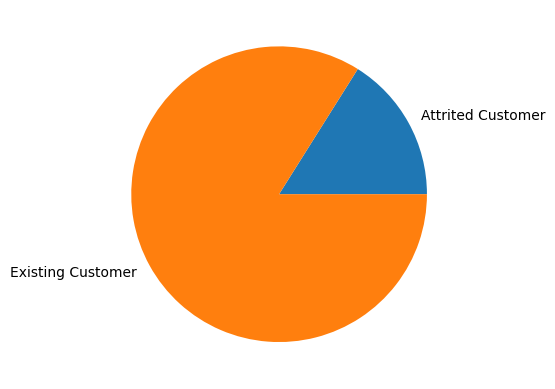

In [44]:
# buat pie chart 

afCounting = [1627, 8500]
afLabels = ['Attrited Customer', 'Existing Customer']

plt.pie(afCounting, labels = afLabels)

Interpretasi 1.1 berdasarkan data diatas dapat dilihat bahwa kategori dengan jumlah segmen atau frekuensi terbesar berada pada kategori Exsiting Customer

# Nomor 1.2 Visualisasi customer_age

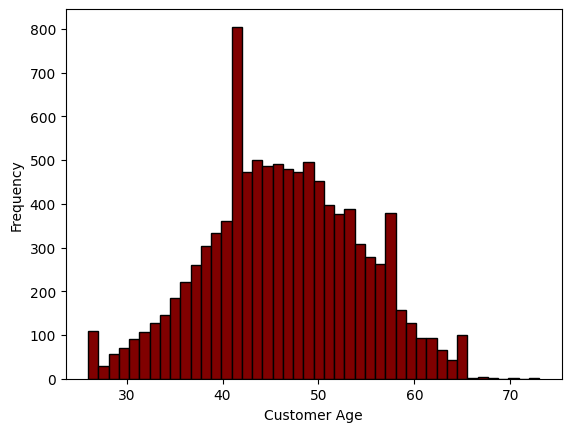

In [45]:
# masukan ke vertikal histogram

plt.hist(df1c['Customer_Age'],
       color = 'maroon',
         edgecolor = 'black',
        bins = "rice"
        )
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()


Interpretasi 1.2 : berdasarkan data diatas dapat dilihat bahwa sebaran frekuensi tertinggi dari Customer Age berada di tengah data yaitu bekisar dari usia 40 tahun - 50 tahun

# Nomor 1.3 Visualisasi Gender

([<matplotlib.patches.Wedge at 0x1a189f2ae70>,
 [Text(-0.10035601460401275, 1.0954125571367161, 'Female'),
  Text(0.10035584920131721, -1.0954125722900403, 'Male')])

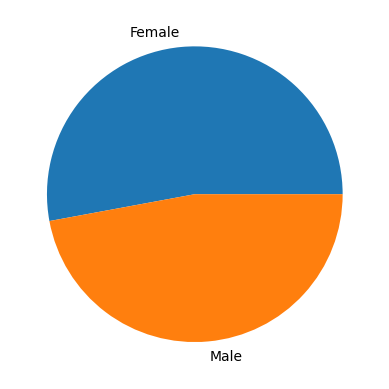

In [59]:
# buat isi Pie Chart

GenderL = list(df1c['Gender'].value_counts().index)
Gender_Count = list(df1c['Gender'].value_counts().values)

#Buat pie chart
plt.pie(Gender_Count, labels = GenderL)

In [62]:
GenderL = list(df1c['Gender'].value_counts().index)
Gender_Count = list(df1c['Gender'].value_counts().values)

print(GenderL)
print(Gender_Count)

['Female', 'Male']
[np.int64(5358), np.int64(4769)]


Interpretasi 1.3 : berdasarkan data diatas dapat dilihat bahwa kategori dengan jumlah segmen atau frekuensi terbesar berada pada kategori jenis kelamain perempuan 

# 1.4 Visualisasi Education Level

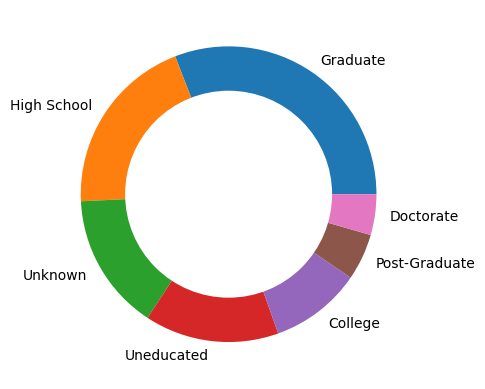

In [53]:
# buat isi donut chart
ed1L = list(df1c['Education_Level'].value_counts().index) # label
ed1_count = list(df1c['Education_Level'].value_counts().values) 

plt.pie(ed1_count, labels = ed1L)

# buat lingkaran
centre_circle = plt.Circle((0,0),0.70, fc = 'white')
fig = plt.gcf()

# menambahkan lingkaran
fig.gca().add_artist(centre_circle)

Interpretasi 1.4 : berdasarkan data diatas dapat dilihat bahwa kategori dengan jumlah segmen atau frekuensi terbesar berada pada kategori graduate, sedangkan segmen ada frekuensi terkecil ada pada kategori Doctorate dan Post-Graduate

# 1.5 Visualisasi Income Category

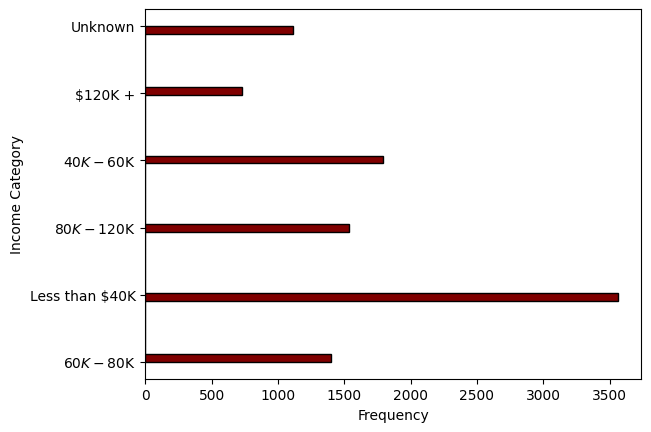

In [50]:
# masukan ke horizontal histogram

plt.hist(df1c['Income_Category'],
       color = 'maroon',
         edgecolor = 'black',
         orientation = 'horizontal',
        bins = "rice"
        )
plt.xlabel('Frequency')
plt.ylabel('Income Category')
plt.show()

Interprestasi 1.5 : berdasarkan data diatas dapat dilihat bahwa frekuensi tertinggi dari income category yaitu berada pada kategori less than $40k, sedangkan frekuensi terendah berada pada kategori +120k 

# Nomor 3 Buatlah 1 visualisasi menggunakan countplot yang memadukan lebih dari satu kolom (bebas antar kolom yang mana saja)

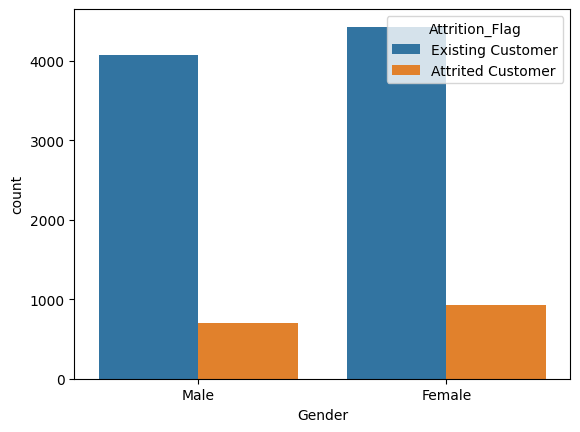

In [51]:
# kolom - Gender & attrition flag
# awal menggunakan seaborn


sns.countplot(x ='Gender', hue = 'Attrition_Flag', data = df1c)

plt.show()

Interpretasi Nomor 3 : dapat dilihat pada data attrition flag berdasarkan jenis kelamin, jumlah exsiting customer & attrited customer lebih tinggi pada jenis kelamin perempuan dibandingkan dengan laki-laki

# Nomor Buatlah 4 visualisasi menggunakan scatterplot yang memadukan lebih dari satu kolom (bebas antar kolom yang mana saja)

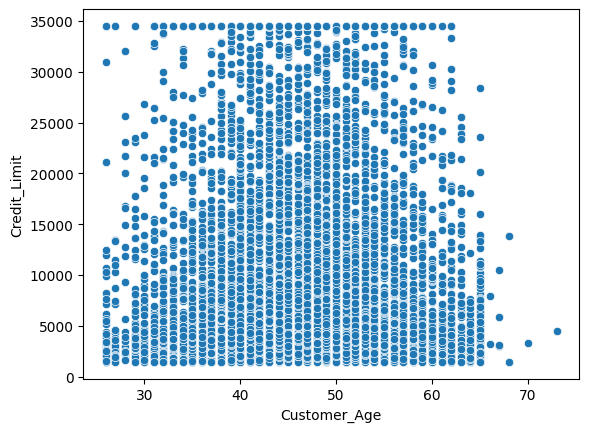

In [190]:
# kolom (numerik) - Customer Age dan Credit Limit

# x = Independen (pemberi pengaruh)
# y = dependen (yang dipengaruhi)

sns.scatterplot(x = 'Customer_Age', y = 'Credit_Limit', data = df1c)

plt.show()

Interpretasi Nomor 4 : dapat dilihat berdasarkan data credit limit dengan usia customer hubungan yang terjadi adalah hubungan yang rendah atau tidak ada hubungan diantara keduanya

# Nomor 5 Buatlah 1 visualisasi menggunakan heatmap yang memadukan lebih dari satu kolom (bebas antar kolom yang mana saja)

In [30]:
# sebuah heat map membutuhkan data 2d 
dfheatmap = df1c.drop(['CLIENTNUM','Attrition_Flag','Customer_Age', 'Gender','Dependent_count','Education_Level','Marital_Status',
'Income_Category','Card_Category','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Avg_Utilization_Ratio'], axis = 1)

dfheatmap.head()

,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,12691.0,777,11914.0,1.335,1144,42,1.625
1,8256.0,864,7392.0,1.541,1291,33,3.714
2,3418.0,0,3418.0,2.594,1887,20,2.333
3,3313.0,2517,796.0,1.405,1171,20,2.333
4,4716.0,0,4716.0,2.175,816,28,2.500


In [31]:
#buat korelasi
correlation = dfheatmap.corr()
correlation

,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
Credit_Limit,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020
Total_Revolving_Bal,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861
Avg_Open_To_Buy,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076
Total_Amt_Chng_Q4_Q1,0.012813,0.058174,0.007595,1.000000,0.039678,0.005469,0.384189
Total_Trans_Amt,0.171730,0.064370,0.165923,0.039678,1.000000,0.807192,0.085581
Total_Trans_Ct,0.075927,0.056060,0.070885,0.005469,0.807192,1.000000,0.112324
Total_Ct_Chng_Q4_Q1,-0.002020,0.089861,-0.010076,0.384189,0.085581,0.112324,1.000000


<Axes: >

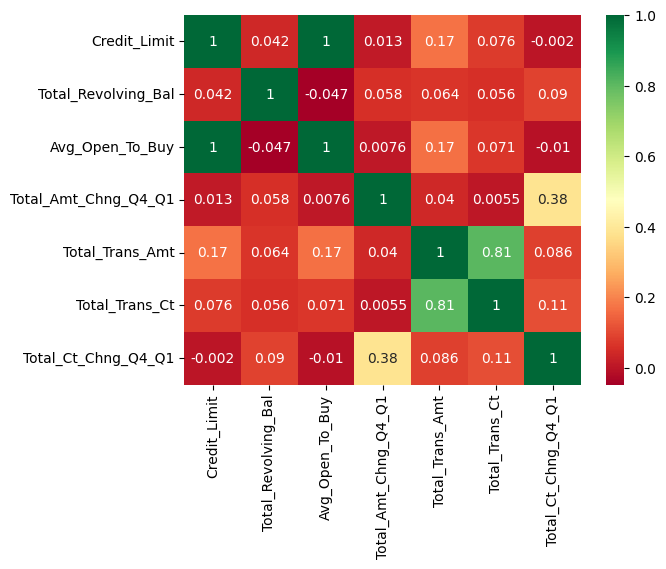

In [32]:
#masukan ke heatmap
sns.heatmap(correlation, cmap = 'RdYlGn', annot = True)

Interpretasi Nomor 5 : berdasarkan data diatas dapat dilihat bahwa terdapat hubungan yang kuat antara variabel credit limit dengan variabel avg open to buy, selain itu ada juga variabel total trans ct dengan variabel total trans amt